<a href="https://colab.research.google.com/github/khalilkhan1111/corona_virus_tweet_setiment_analysis/blob/main/Corona_virus_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name -**          - Khalil Ullah Khan


# **Project Summary -**

At the conclusion of our project, we have identified three models, namely Logistic Regression, K-NN Classifier, and Naive Bayes, for sentiment analysis. After evaluating their performance, the Logistic Regression model emerged as the top performer, achieving the highest accuracy with a score of 60 percent.

Sentiment analysis is a valuable task in the field of natural language processing and text mining. It involves analyzing and understanding sentiment patterns in textual data, which can provide valuable insights for businesses, brands, and organizations. By accurately classifying sentiments, businesses can gain a better understanding of customer opinions, monitor brand reputation, and make data-driven decisions.

In our project, we evaluated multiple machine learning models for sentiment analysis. The three models chosen, Logistic Regression, K-NN Classifier, and Naive Bayes, are widely used and have proven to be effective in various text classification tasks.

To start our analysis, we initially had a dataset with six columns and 41,157 rows. After dropping the unnecessary columns and selecting only the "OriginalTweet" and "Sentiment" columns, we reduced the dataset to 32,567 rows, which provided a focused and relevant dataset for our sentiment analysis task.

One interesting observation from our analysis was that the majority of the tweets in the dataset originated from London, followed by the United States. This geographical insight could be useful for businesses targeting specific regions or monitoring sentiment trends in different locations.

We then proceeded to build and evaluate the selected models. The Logistic Regression model, with its 60 percent accuracy, outperformed the other models in terms of overall performance. This high accuracy indicates that the Logistic Regression model was effective in accurately classifying sentiments in the dataset.

It is worth noting that accuracy is not the only evaluation metric to consider when assessing the performance of sentiment analysis models. Precision, recall, and F1-score are also important metrics to evaluate the model's performance on different sentiment classes. However, the specific values for these metrics were not provided in the project summary.

Furthermore, we validated the performance of our best models by testing them on new, unseen tweets. The models demonstrated a good level of accuracy and provided reliable predictions, indicating their ability to generalize well and perform accurately on real-world data.

In conclusion, our project demonstrates the effectiveness of the Logistic Regression, K-NN Classifier, and Naive Bayes models for sentiment analysis tasks. While the Logistic Regression model stood out with the highest accuracy, the other models also provided valuable insights and predictions. Selecting the most suitable model for sentiment analysis depends on various factors, including accuracy, interpretability, scalability, and the specific requirements of the business or application.

Overall, sentiment analysis plays a crucial role in understanding and analyzing sentiments in textual data. By utilizing machine learning models, businesses can gain valuable insights into customer opinions, sentiments, and trends, enabling them to make informed decisions and drive positive business impact.

# **GitHub Link -**

https://github.com/khalilkhan1111/corona_virus_tweet_setiment_analysis/blob/main/Corona_virus_Tweet_Sentiment_Analysis.ipynb

# **Problem Statement**


**This challenge ask you to build a classification model to predict the sentiment of Covid-19 Tweets. The tweets have been pulled from twitter and manual tagging has been done then. The names and usernames have been given codes to avoid any privacy concerns.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno

#Importing Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load dataset
df = pd.read_csv('/content/drive/MyDrive/imp/project/Coronavirus Tweets.csv', encoding='latin1')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(41157, 6)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

<Axes: >

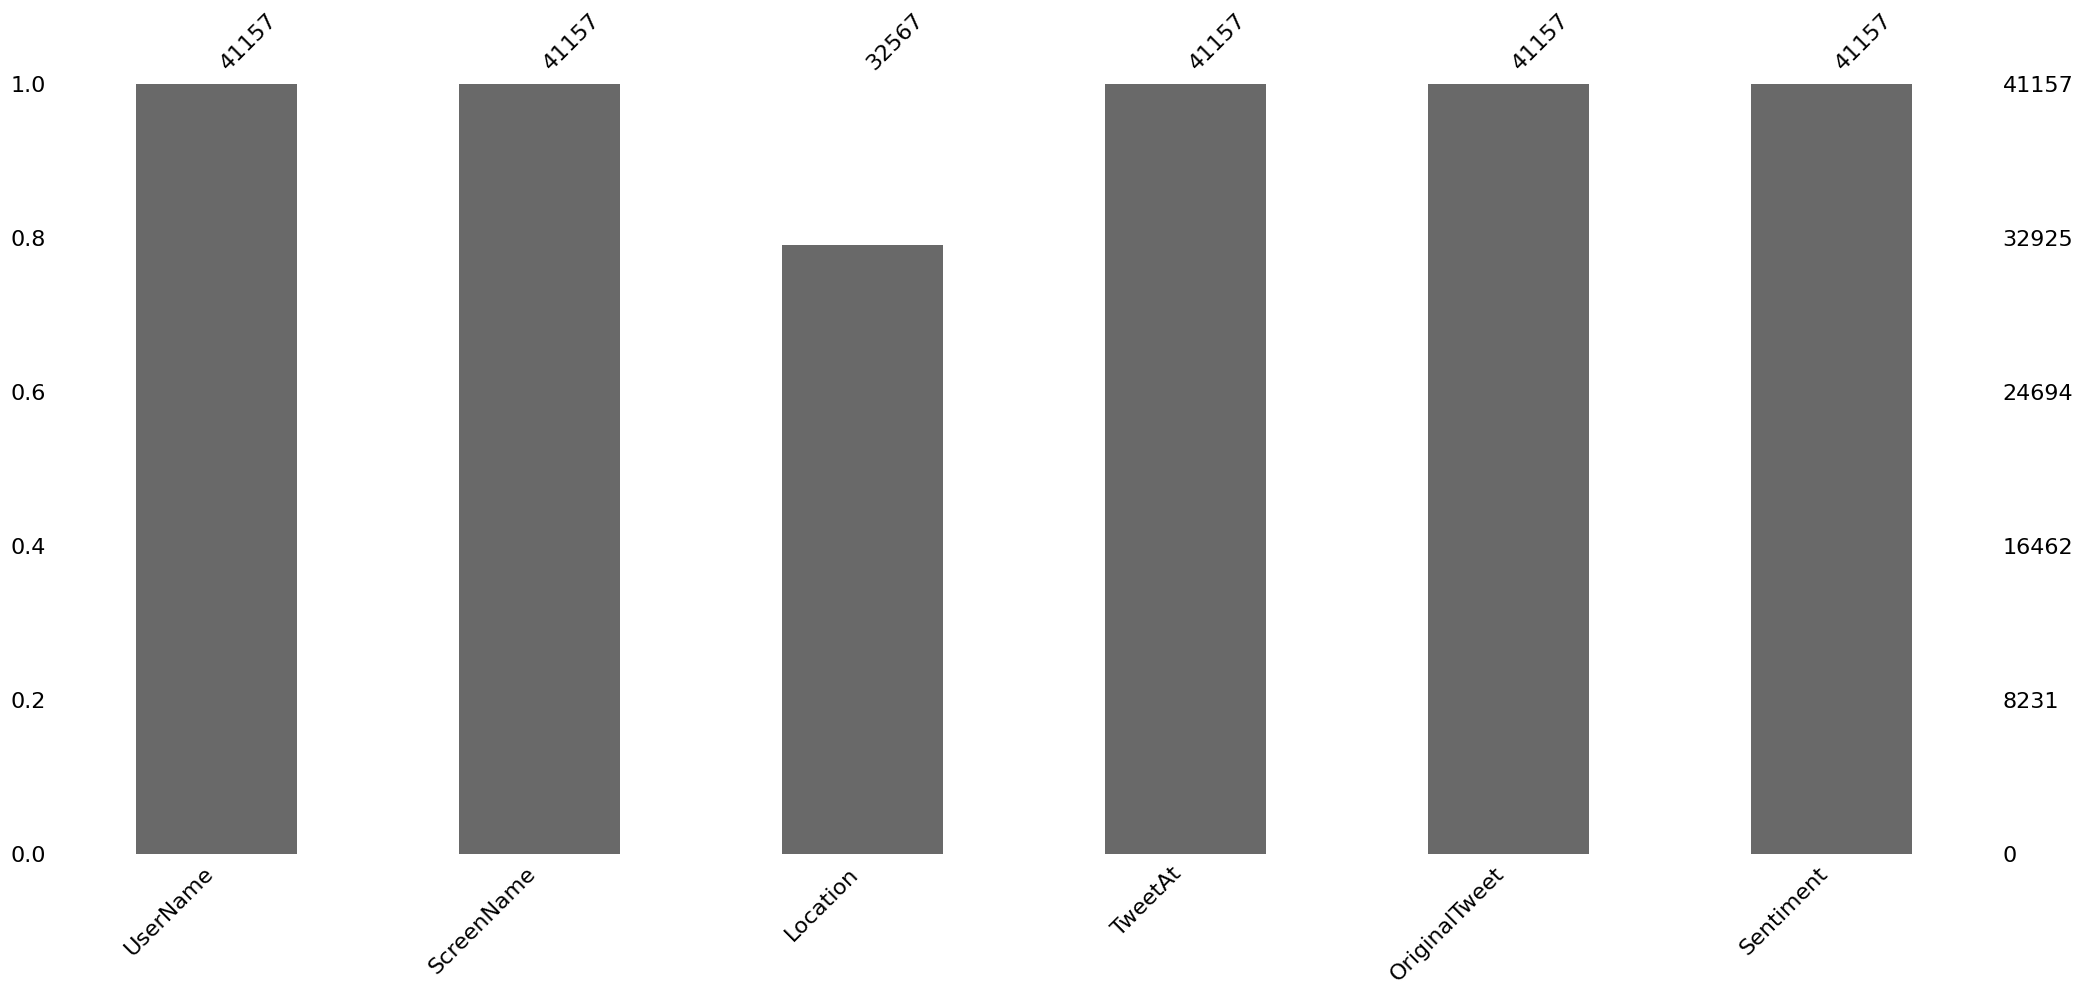

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

in location column there are 8590 values are missing in the dataset rest of the column does not have any missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


### Variables Description

Columns names are :-

#**Username -**    Coded Username

#**ScreenName-**   Coded ScreenName

#**Location-**     Region of origin

#**TweetAt-**      Tweet Timing

#**OriginalTweet-** First tweet in the thread

#**Sentiment-**    Sentiment of the tweet

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values for {column}: {unique_values}" )

Unique values for UserName: [ 3799  3800  3801 ... 44953 44954 44955]
Unique values for ScreenName: [48751 48752 48753 ... 89905 89906 89907]
Unique values for Location: ['London' 'UK' 'Vagabonds' ... 'Juba south sudan' 'OHIO'
 'i love you so much || he/him']
Unique values for TweetAt: ['16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020']
Unique values for OriginalTweet: ['@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8'
 'advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shoppin

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Drooping Null values from the dataset
df.dropna(inplace=True)

In [ ]:
# Dataset shape after dropping null rows
df.shape

(32567, 6)

In [ ]:
#checking unique Location column
df['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [ ]:
#checking unique sentiment column
df['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

### What all manipulations have you done and insights you found?

1. Drop the null values and now value is 32567

2. Check the Locations lenght which is 12220

3. Check the sentiment column and found there are 5 unique values in this column


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code
# Tweet count for each sentiment
sentiment_count = df['Sentiment'].value_counts().reset_index()
sentiment_count.columns = ['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


Text(0, 0.5, 'count')

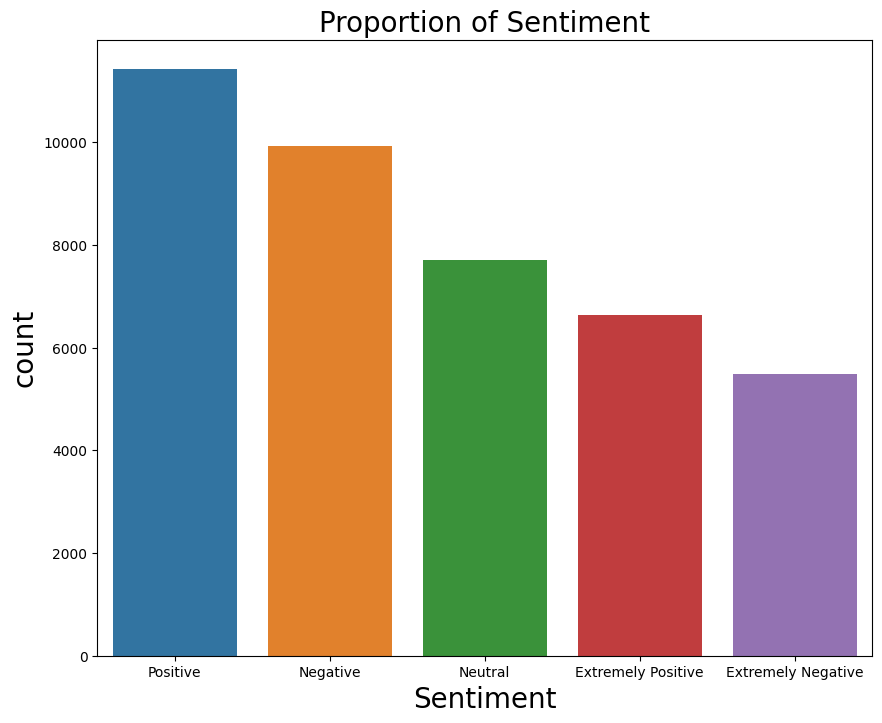

In [ ]:
#visualize the tweet count of sentiment
plt.figure(figsize=(10,8))
tc = sns.barplot(x="Sentiment", y='count', data=sentiment_count)
tc.set_title("Proportion of Sentiment", fontsize=20)
tc.set_xlabel("Sentiment", fontsize=20)
tc.set_ylabel('count', fontsize=20)

##### 1. Why did you pick the specific chart?

To visualize the tweet count of sentiment

##### 2. What is/are the insight(s) found from the chart?

There are 5 different sentiment but majority of sentiment is positive which is more than 10,000, then negative which is 10,000 and then neutral which is more than 7,000 tweets. Least 2 are extreamly positive and extreamly negative

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 By understanding the sentiment of the tweets, It can gain valuable insights into users opinions, preferences, and satisfaction levels.

#### Chart - 2

In [56]:
# Chart - 2 visualization code
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
df = df.replace(replace_values)

In [57]:
sentiment_count1 = df['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,positive,11422
1,negative,9917
2,neutral,7713
3,extremely positive,6624
4,extremely negative,5481


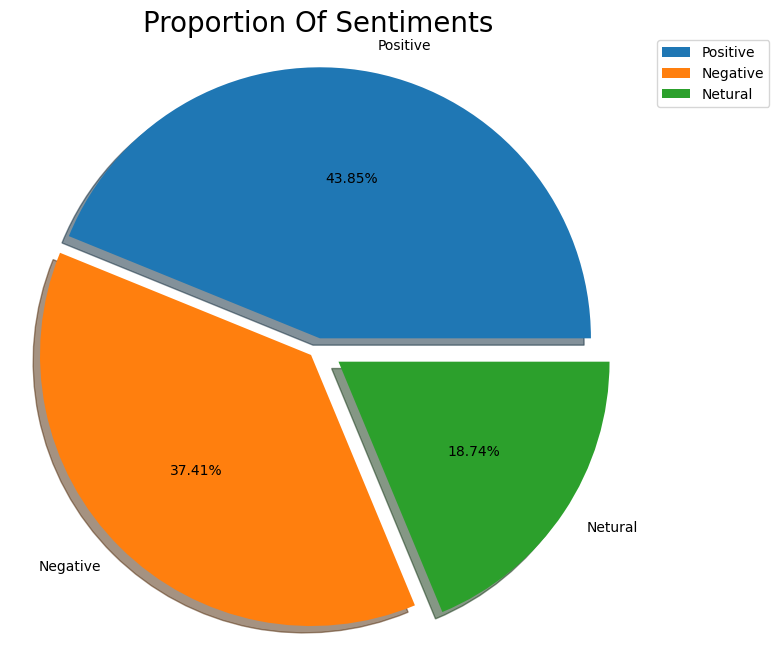

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = df['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

##### 1. Why did you pick the specific chart?

We have merge data of extreamly positive in positive and extramly negative in negative and then visualize the data and find out the percentage of different sentiments.

##### 2. What is/are the insight(s) found from the chart?

There are 43.85 percent of positive tweet count, 37.41 percent of negative tweet count and 18.74 percent of neutral tweet count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the sentiments can still help create a positive business impact, despite the slightly lower percentage of positive tweets compared to negative tweets. By understanding the sentiment distribution among the tweets, it can still extract valuable information about users perceptions.

#### Chart - 3

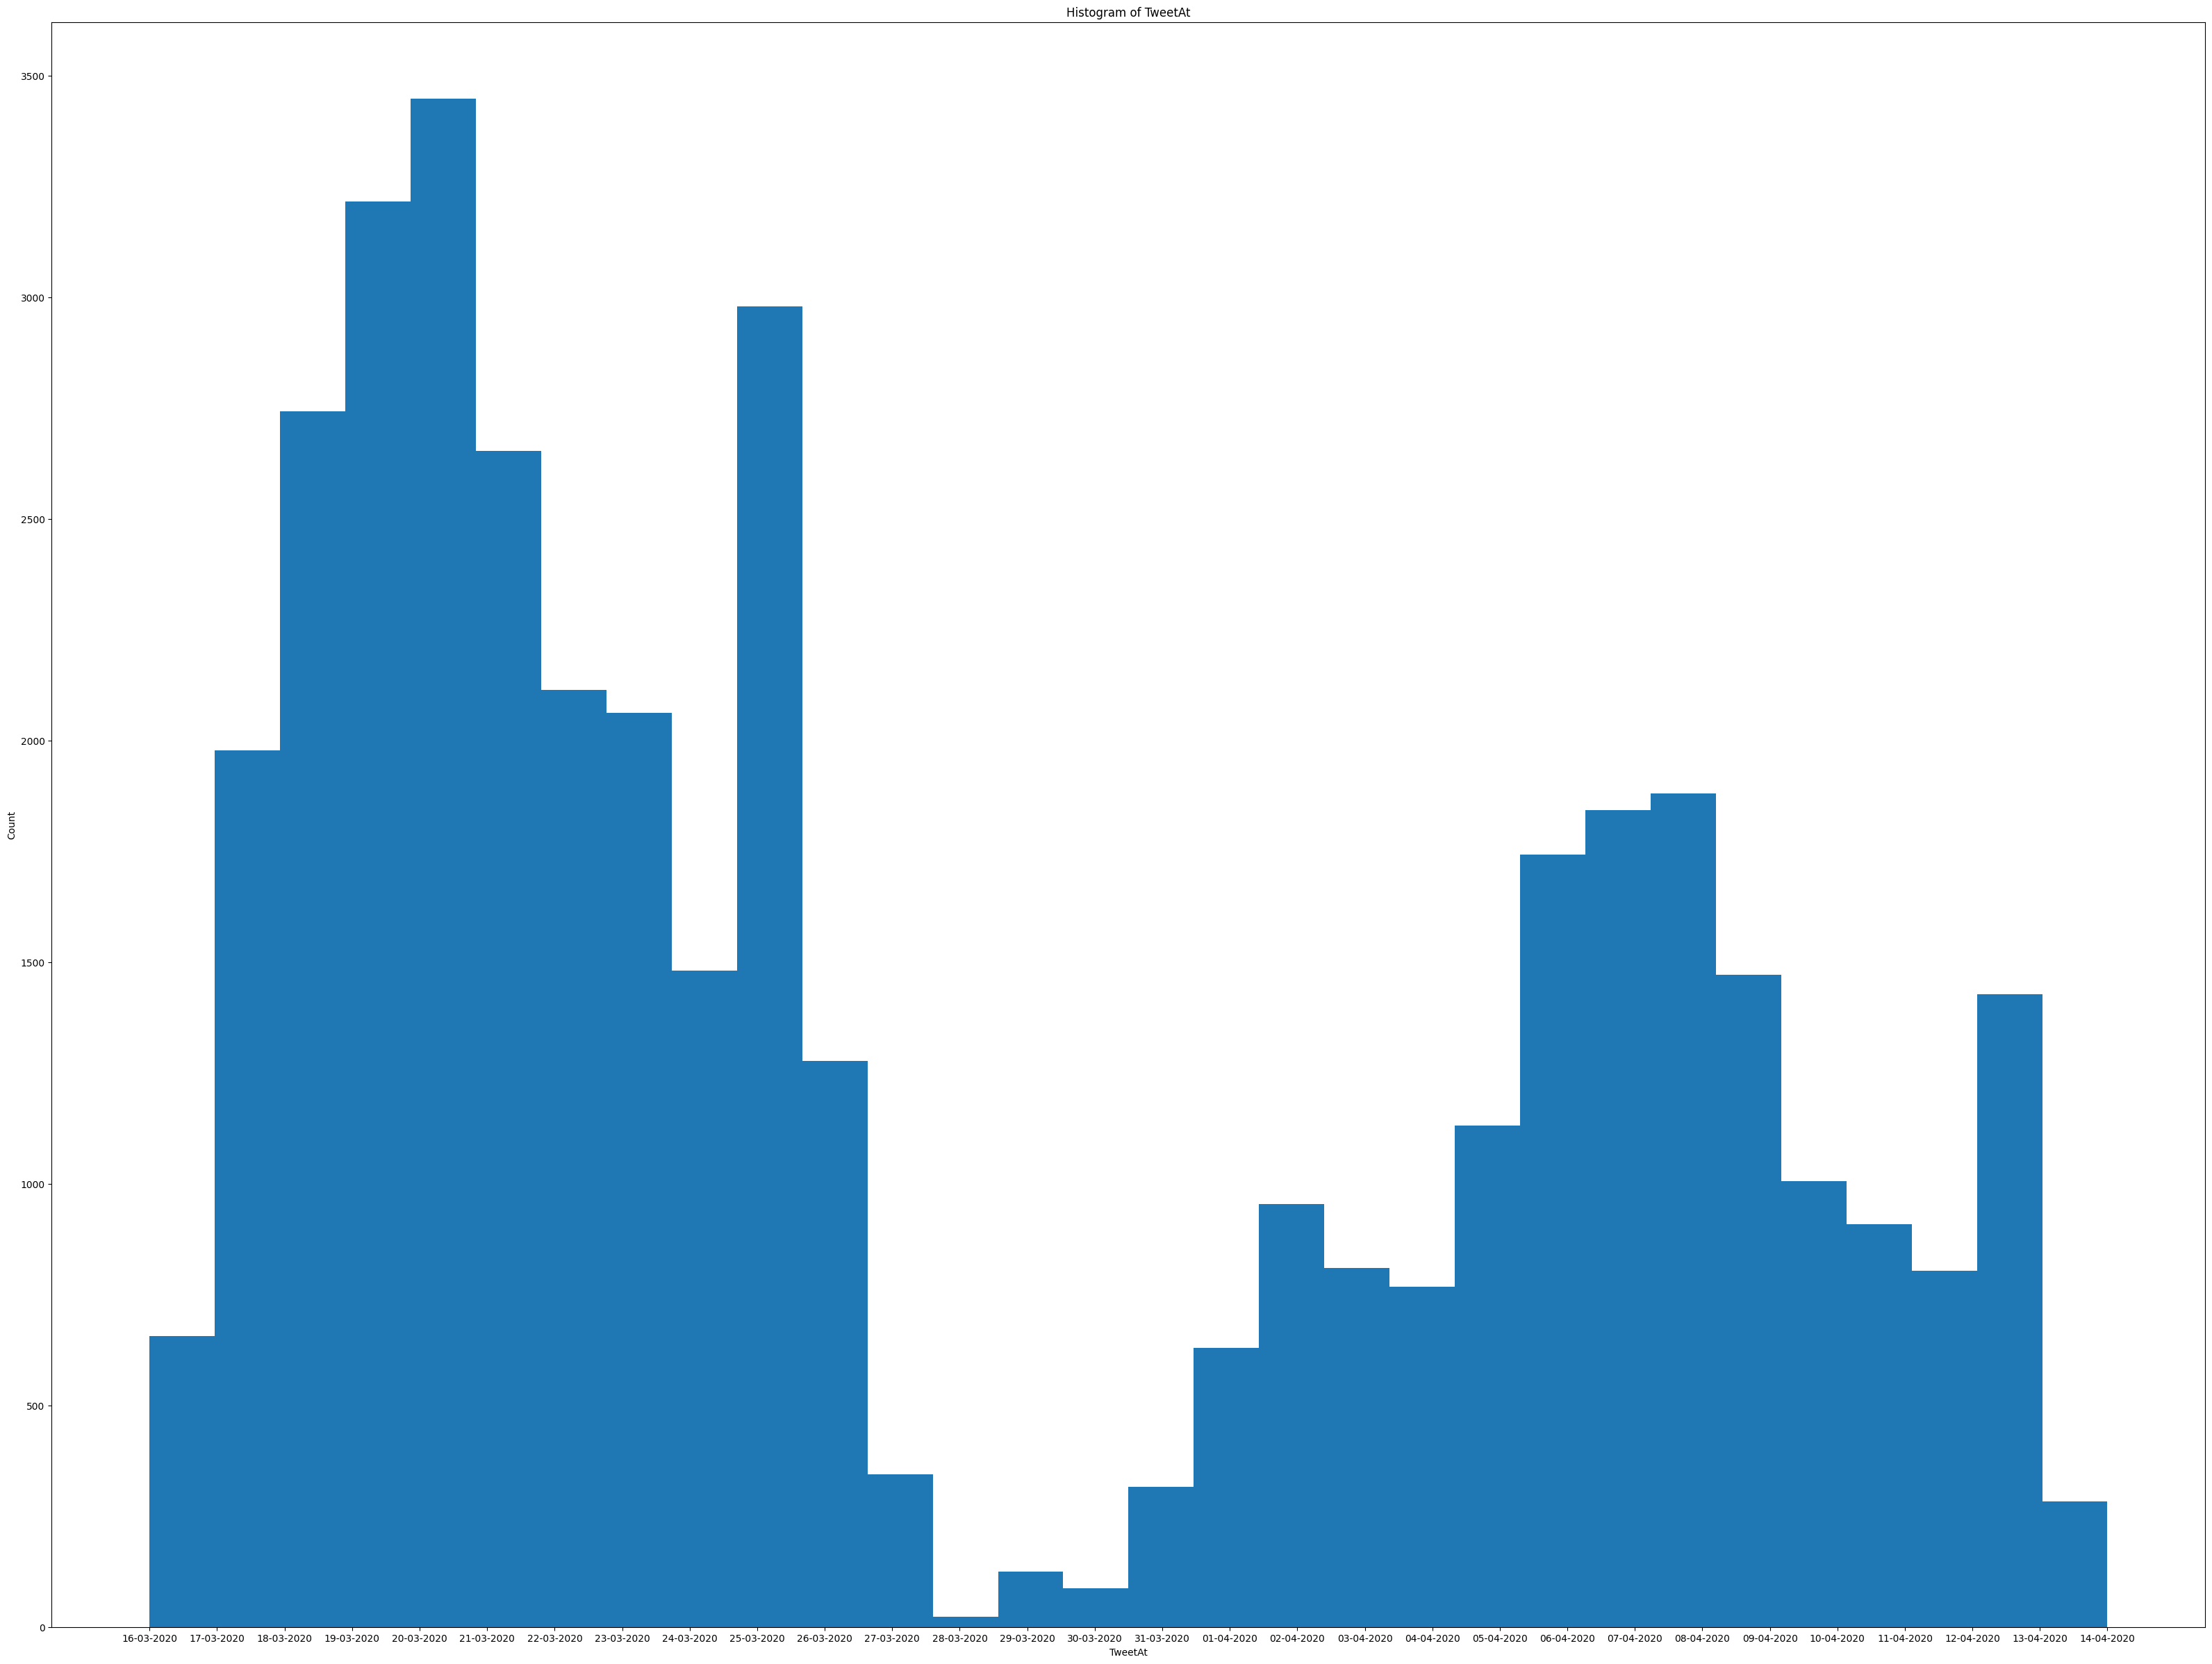

In [ ]:
# Chart - 3 visualization code
#CountPlot for OriginalTweet according to "TweetAt" column
plt.figure(figsize=(40, 30))
plt.hist(df['TweetAt'], bins=30)
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Histogram of TweetAt')
plt.show()

##### 1. Why did you pick the specific chart?

To check the highest number of tweet in a particular date

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweet done at 20 march 2020 which is approx 3500. Least tweet done at 28 march 2020 which is approx 50 tweets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Negative Business Impact:
The insights gained from the low number of tweets on 28th March 2020 can indicate potential negative impacts on the business:

Lack of Engagement: A significantly low volume of tweets on a specific date suggests a lack of engagement or interest from users

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
#find the top 10 location vale count
top_location = df['Location'].value_counts().sort_values(ascending=False)[:10]
top_location

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Figure size 1800x800 with 0 Axes>

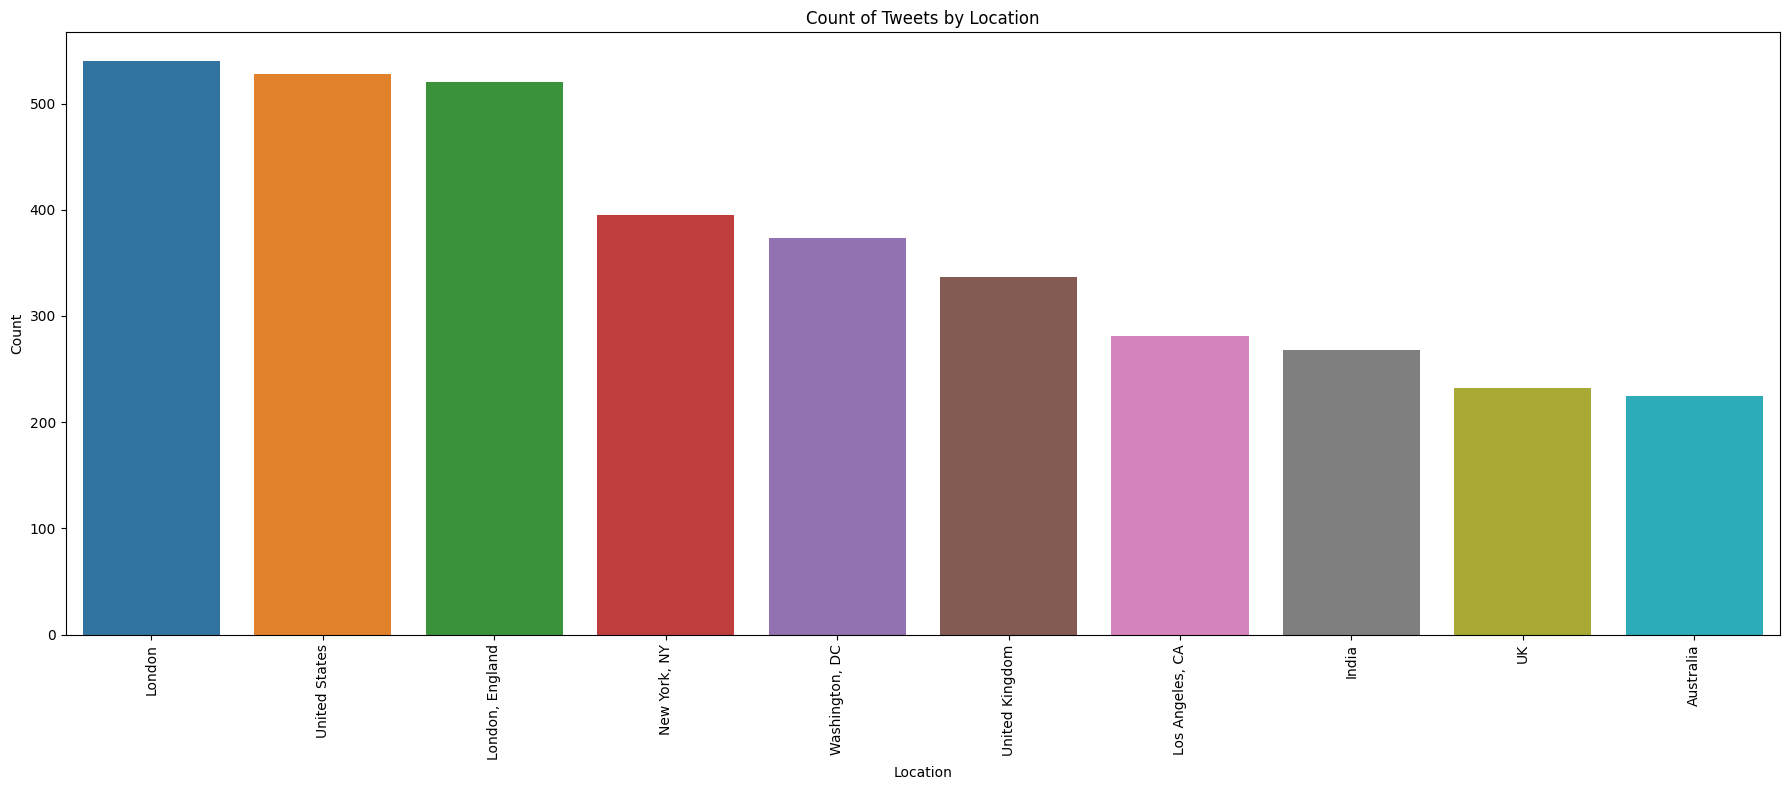

In [ ]:
plt.figure(figsize=(18,8))
plt.figure(figsize=(18, 8))
sns.countplot(data=df[df['Location'].isin(top_location.index)], x='Location', order=top_location.index)
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Tweets by Location')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To check the top 10 location from where the highest number of tweet is coming from

##### 2. What is/are the insight(s) found from the chart?

the highest number of tweets are coming from London, US and London-England which is approx 500.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

no there is not a negatie impact

#### Chart - 5

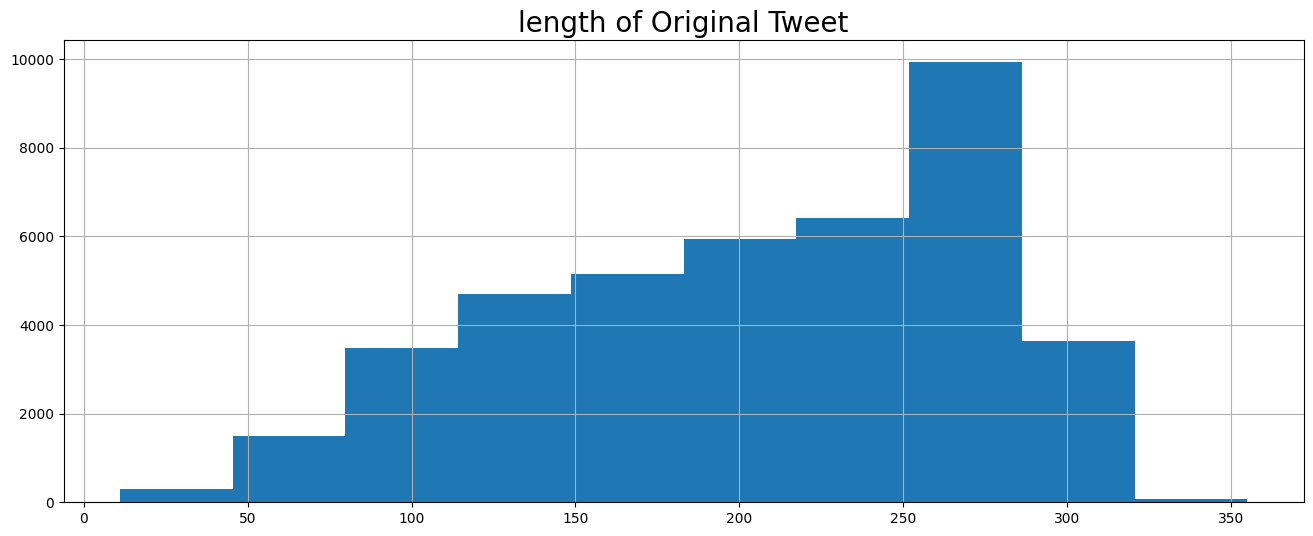

In [ ]:
# Chart - 5 visualization code
#plot of the length of OriginalTweet.
plt.figure(figsize=(16,6))
plt.grid()
plt.title('length of Original Tweet', fontsize = 20)
plt.hist(df['OriginalTweet'].str.len())
plt.show()


##### 1. Why did you pick the specific chart?

To observe the length of original tweets.

##### 2. What is/are the insight(s) found from the chart?

A 10,000 tweets is written about 275 words and this is highest. And average tweet length range is from 200 to 250.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Longer tweets with more words allow users to convey more detailed information about Corona virus.

#### Chart - 6  Correlation Heatmap

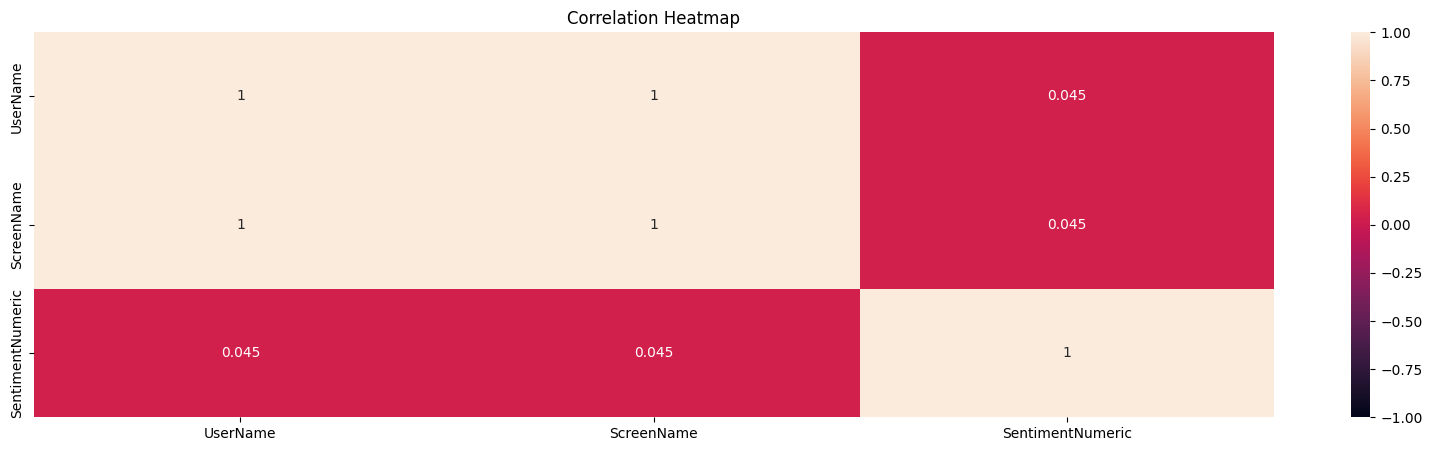

In [ ]:
# Chart - 6 visualization code
# check for existence of corelation
plt.figure(figsize=(20,5))
plt.title('Correlation Heatmap')
cor = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=None, annot=True )


##### 1. Why did you pick the specific chart?

To check the co-relation between username, screenname and sentiment numeric.

##### 2. What is/are the insight(s) found from the chart?

Username and screen name are highly co-related but sentiment number is not co-related with screen name and username.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

there is a strong correlation between username and screen name, it indicates that users are aligning their online identities and followers easily identify

#### Chart - 7

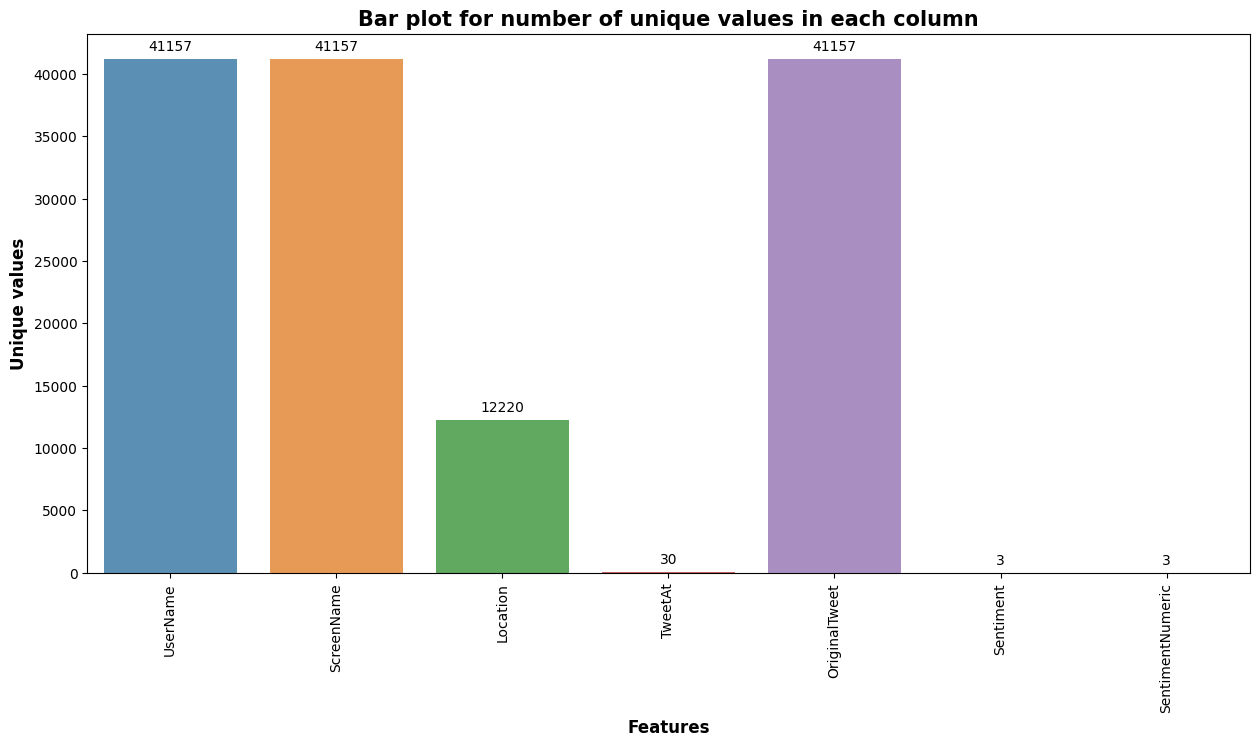

In [ ]:
# Chart - 7 visualization code
#Unique value in each feature columns
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

To identify the unique values in each column

##### 2. What is/are the insight(s) found from the chart?

Username, screenname and original tweets have unique values but sentiment and sentiment numeric has least unique values.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The unique values of original tweets suggest that users are producing a variety of content, which can be beneficial for attracting and engaging a wider audience.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# Importing the required library
from collections import defaultdict

# Copying the dataframe
df1 = df.copy()

# Creating the new column 'Text'
df1['text'] = df1.OriginalTweet
df1["text"] = df1["text"].astype(str)


In [ ]:
def create_corpus(target):
    corpus=[]

    for x in df1[df1['Sentiment']==target ]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [ ]:
# Designing a compilation to emphasize a Positive sentiment.
corpus= create_corpus("Positive")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

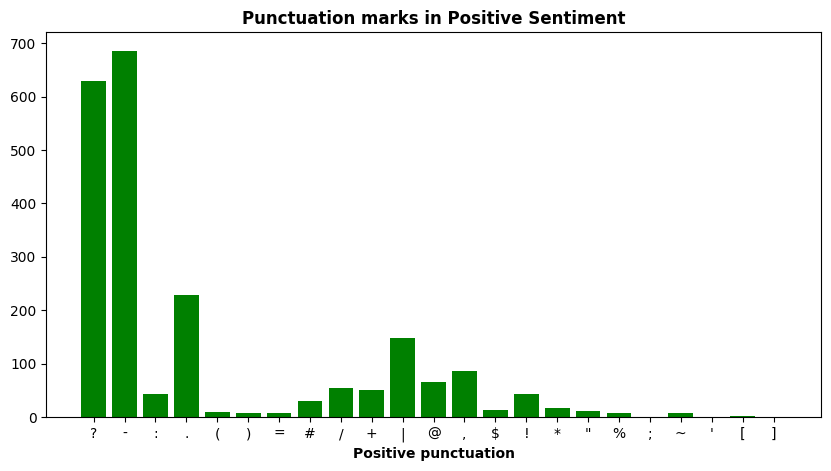

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='green')
plt.xlabel('Positive punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Positive Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in positive sentiments

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

# Designing a compilation to emphasize a Negative sentiment.
corpus= create_corpus("Negative")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

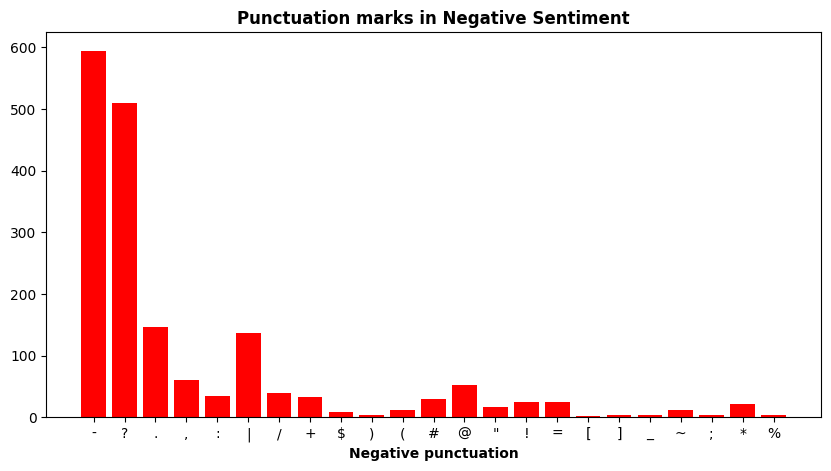

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='Red')
plt.xlabel('Negative punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Negative Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in negative sentiments


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

# Designing a compilation to emphasize a neutral sentiment.
corpus= create_corpus("Neutral")

dic= defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())

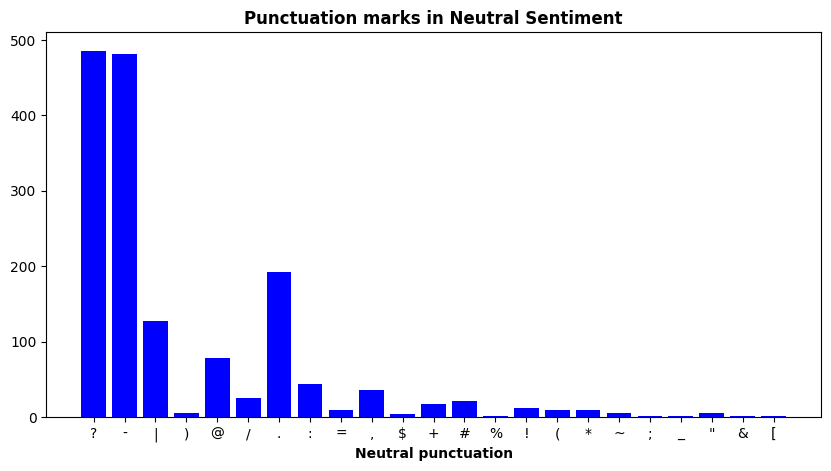

In [ ]:
# visualize the dataset
plt.figure(figsize=(10,5))
plt.bar(x,y,color='blue')
plt.xlabel('Neutral punctuation', fontweight = 'bold')
plt.title('Punctuation marks in Neutral Sentiment',fontweight ='bold')
plt.show()

##### 1. Why did you pick the specific chart?

To get the punctuation mark in neutral sentiments


##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# it is already done

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [5]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
# Perform label encoding
label_encoder = LabelEncoder()
df['Location_Encoded'] = label_encoder.fit_transform(df['Location'])

# Print the encoded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv http

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoding is typically used when dealing with categorical variables that have an inherent ordinal relationship or when the machine learning algorithm requires numerical input.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [6]:
# Expand Contraction
#Define contraction mapping dictionary
contractions = {"I'm": 'I am', "You're": 'You are', "I'll": 'I will',"He's": 'He is', "She's": 'She is', "It's": 'It is',"What's":'what is'}

# Function to expand contractions
def expand_contractions(text):
    words = text.split()
    expanded_words = [contractions[word] if word in contractions else word for word in words]
    expanded_text = ' '.join(expanded_words)
    return expanded_text

# Apply expansion of contractions
df['Sentiment_Expanded'] = df['Sentiment'].apply(expand_contractions)

# Print the expanded dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        London  16-03-2020   
1          3800       48752                            UK  16-03-2020   
2          3801       48753                     Vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  Wellington City, New Zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @MeNyrbie @Phil_Gahan @Chrisitv http

#### 2. Lower Casing

In [7]:
# Lower Casing
# Convert all columns to lowercase
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Print the modified dataframe
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @menyrbie @phil_gahan @chrisitv http

#### 3. Removing Punctuations

In [8]:
# Text Cleaning
df = df.copy()

In [14]:
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https t co ifz fan pa and https t co xx ghgfz...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,me ready to go at supermarket during the #covi...


In [13]:
# Remove punctions, words wich are not formed letters
# remove special characters, numbers, punctuations
df['Clean_tweet'] = df['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https t co ifz fan pa and https t co xx ghgfz...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,me ready to go at supermarket during the #covi...


#### 4. Removing URLs & Removing words and digits contain digits.

In [11]:
# Remove URLs & Remove words and digits contain digits
#Remove @person character
import re
# write function for removing @user
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [12]:
# Removing url, http, etc.
# create new column with removed @user
df['Clean_tweet'] = np.vectorize(remove_pattern)(df['OriginalTweet'], '@[\w]*')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https://t.co/ifz9fan2pa and https://t.co/xx...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk to your neighbours family to excha...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia: woolworths to give elde...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,"me, ready to go at supermarket during the #cov..."


In [15]:
# Removing short words
# remove short words
df['Clean_tweet'] = df['Clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https ifz fan and https ghgfzcc and https nlzdxno
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk your neighbours family exchange ph...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,food stock not the only one which empty please...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,ready supermarket during the #covid outbreak n...


#### 5. Removing Stopwords & Removing White spaces

In [16]:
# Removing stopwords
# Downloading stopwords library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Remove Stopwords
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [19]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in sw]

  # joining the list of words with space separator
  return " ".join(text)

In [20]:
df['Clean_tweet'] = df['Clean_tweet'].apply(remove_stopwords)


# Obtaining top 5 rows after stopwords removal
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet,RephrasedText
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https ifz fan https ghgfzcc https nlzdxno,hypertext_transfer_protocol ifz fan and hypert...
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...,advice talk your neighbor family exchange tele...
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...,coronavirus Australia Woolworth give aged disa...
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,food stock one empty please panic enough food ...,food stock not the lone one which empty please...
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,ready supermarket #covid outbreak paranoid foo...,ready supermarket during the # covid outbreak ...


In [21]:
# Remove White spaces
# Remove white spaces from the 'Clean_tweet' column
df['Clean_tweet'] = df['Clean_tweet'].str.strip()

# Print the modified DataFrame
print(df)

       UserName  ScreenName                      Location     TweetAt  \
0          3799       48751                        london  16-03-2020   
1          3800       48752                            uk  16-03-2020   
2          3801       48753                     vagabonds  16-03-2020   
3          3802       48754                           NaN  16-03-2020   
4          3803       48755                           NaN  16-03-2020   
...         ...         ...                           ...         ...   
41152     44951       89903  wellington city, new zealand  14-04-2020   
41153     44952       89904                           NaN  14-04-2020   
41154     44953       89905                           NaN  14-04-2020   
41155     44954       89906                           NaN  14-04-2020   
41156     44955       89907  i love you so much || he/him  14-04-2020   

                                           OriginalTweet           Sentiment  \
0      @menyrbie @phil_gahan @chrisitv http

#### 6. Rephrase Text

In [17]:
# Rephrase Text
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define a function to rephrase a sentence
def rephrase_sentence(sentence):
    # Tokenize the sentence into words
    words = word_tokenize(sentence)

    # Iterate over each word and find synonyms
    rephrased_words = []
    for word in words:
        # Get synonyms for each word
        synonyms = wordnet.synsets(word)

        if synonyms:
            # Choose a random synonym as the rephrased word
            rephrased_word = synonyms[0].lemmas()[0].name()
        else:
            # If no synonyms found, keep the original word
            rephrased_word = word

        rephrased_words.append(rephrased_word)

    # Join the rephrased words to form a rephrased sentence
    rephrased_sentence = ' '.join(rephrased_words)
    return rephrased_sentence

# Assuming you have a DataFrame named 'df' with a column containing the text data
# Replace 'your_column' with the actual column name in your DataFrame

# Apply the rephrase_sentence function to the text column
df['RephrasedText'] = df['Clean_tweet'].apply(rephrase_sentence)

# Display the rephrased text
print(df['RephrasedText'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


0        hypertext_transfer_protocol ifz fan and hypert...
1        advice talk your neighbor family exchange tele...
2        coronavirus Australia Woolworth give aged disa...
3        food stock not the lone one which empty please...
4        ready supermarket during the # covid outbreak ...
                               ...                        
41152    airline pilot offer stock supermarket shelf # ...
41153    response ailment not supply mention covid asso...
41154    you know acquiring street_fighter when rationi...
41155    wrong that the smell hand sanitizer start bend...
41156    well new use rift are departure for amazon alt...
Name: RephrasedText, Length: 41157, dtype: object


#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [22]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [23]:
#function for stemming
def stemming(text):
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [24]:
df['stemmed'] = df['Clean_tweet'].apply(lambda x: stemming(x))

In [25]:
#result
df.stemmed.head()

0    h t t p s   i f z   f a n   h t t p s   g h g ...
1    a d v i c e   t a l k   n e i g h b o u r s   ...
2    c o r o n a v i r u s   a u s t r a l i a   w ...
3    f o o d   s t o c k   o n e   e m p t y   p l ...
4    r e a d y   s u p e r m a r k e t   # c o v i ...
Name: stemmed, dtype: object

In [26]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmed'] = df['Clean_tweet'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])

In [27]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Location_Encoded,Sentiment_Expanded,Clean_tweet,RephrasedText,stemmed,lemmed
0,3799,48751,london,16-03-2020,@menyrbie @phil_gahan @chrisitv https://t.co/i...,neutral,5690,neutral,https ifz fan https ghgfzcc https nlzdxno,hypertext_transfer_protocol ifz fan and hypert...,h t t p s i f z f a n h t t p s g h g ...,"[h, t, t, p, s, , i, f, z, , f, a, n, , h, ..."
1,3800,48752,uk,16-03-2020,advice talk to your neighbours family to excha...,positive,10282,positive,advice talk neighbours family exchange phone n...,advice talk your neighbor family exchange tele...,a d v i c e t a l k n e i g h b o u r s ...,"[a, d, v, i, c, e, , t, a, l, k, , n, e, i, ..."
2,3801,48753,vagabonds,16-03-2020,coronavirus australia: woolworths to give elde...,positive,10551,positive,coronavirus australia woolworths give elderly ...,coronavirus Australia Woolworth give aged disa...,c o r o n a v i r u s a u s t r a l i a w ...,"[c, o, r, o, n, a, v, i, r, u, s, , a, u, s, ..."
3,3802,48754,NaN,16-03-2020,my food stock is not the only one which is emp...,positive,12220,positive,food stock one empty please panic enough food ...,food stock not the lone one which empty please...,f o o d s t o c k o n e e m p t y p l ...,"[f, o, o, d, , s, t, o, c, k, , o, n, e, , ..."
4,3803,48755,NaN,16-03-2020,"me, ready to go at supermarket during the #cov...",extremely negative,12220,extremely negative,ready supermarket #covid outbreak paranoid foo...,ready supermarket during the # covid outbreak ...,r e a d y s u p e r m a r k e t # c o v i ...,"[r, e, a, d, y, , s, u, p, e, r, m, a, r, k, ..."


##### Which text normalization technique have you used and why?

It is used to reducing words to their base or root form, often by removing suffixes or prefixes.

#### 9. Part of speech tagging

In [28]:
# POS Taging
from nltk.tokenize import word_tokenize

# Download the necessary resources for POS tagging
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to perform POS tagging on a sentence
def pos_tagging(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    pos_tags = nltk.pos_tag(tokens)  # Perform POS tagging on the tokens
    return pos_tags

# Apply POS tagging to the 'Clean_tweet' column and create a new column 'POS_tags'
df['POS_tags'] = df['Clean_tweet'].apply(pos_tagging)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


#### 10. Text Vectorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the 'Clean_tweet' column and transform the data
vectorized_data = vectorizer.fit_transform(df['Clean_tweet'])

# Convert the vectorized data to a DataFrame
vectorized_df = pd.DataFrame(vectorized_data.toarray(), columns=vectorizer.get_feature_names_out())


##### Which text vectorization technique have you used and why?

I used TF-IDF (Term Frequency-Inverse Document Frequency) vectorization to represent the text data. TF-IDF is a widely used technique for text vectorization because it takes into account the importance of a word in a specific document as well as its relevance across the entire corpus.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# it is already done

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [38]:
# Transform Your data
## defining Independent variable
X= df['lemmed']

## defining dependent variable
y=df['Sentiment']

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

In [73]:

from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

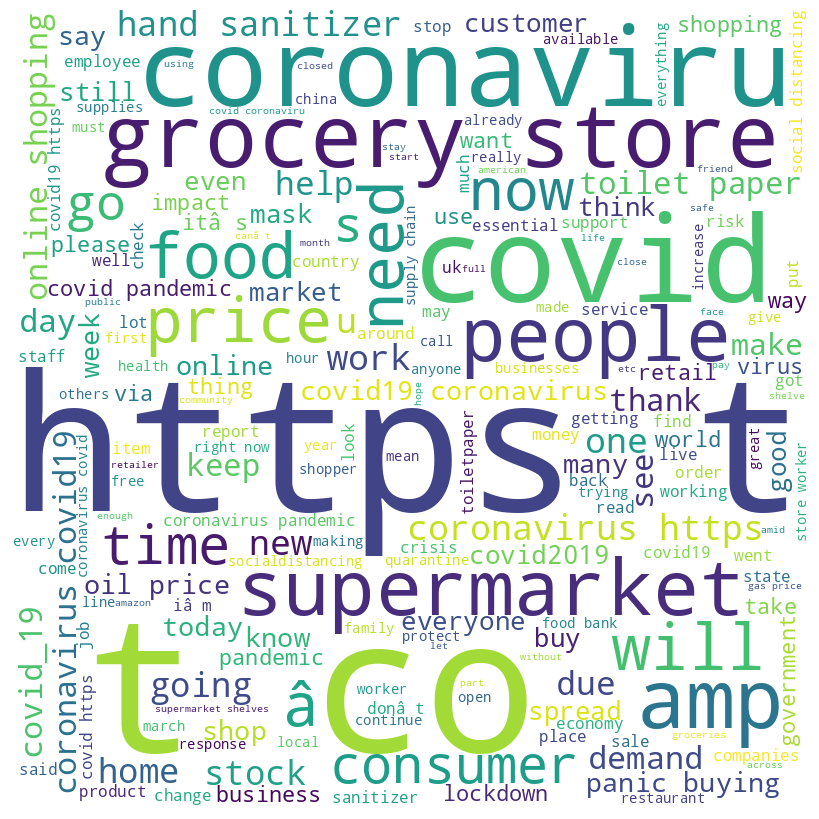

In [74]:
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [81]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Clean_tweet'], df['Sentiment'], test_size=0.2, random_state=42)

In [76]:
#checking shape of splitted data
print(X_train.shape)
y_test.shape

(28809,)


(12348,)

In [77]:
#checking splitted data
print(X_train.head())
y_train.head()

7616     [s, t, a, y,  , h, o, m, e,  , u, n, l, e, s, ...
27184    [s, h, o, p, p, i, n, g,  , s, u, p, e, r, m, ...
6444     [c, o, n, t, i, n, u, e,  , m, o, n, i, t, o, ...
18114    [a, n, y, o, n, e,  , e, l, s, e,  , f, e, e, ...
27417    [f, r, i, d, a, y,  , #, s, y, r, i, a,  , d, ...
Name: lemmed, dtype: object


7616     extremely positive
27184               neutral
6444     extremely positive
18114              positive
27417               neutral
Name: Sentiment, dtype: object

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [85]:
#Logistic regression
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [82]:
from sklearn.pipeline import Pipeline

# Create a pipeline
model = Pipeline([('vectorizer', tvec), ('classifier', LR)])

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.5665694849368319


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [86]:
# Visualizing evaluation Metric Score chart
# Predict on the test data
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

extremely negative       0.63      0.48      0.54      1056
extremely positive       0.66      0.54      0.59      1330
          negative       0.51      0.52      0.51      2006
           neutral       0.62      0.66      0.64      1553
          positive       0.52      0.61      0.56      2287

          accuracy                           0.57      8232
         macro avg       0.59      0.56      0.57      8232
      weighted avg       0.57      0.57      0.57      8232



#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'classifier__C': [0.1, 1, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'vectorizer__max_features': [500, 1000, 2000]},
             scoring='accuracy')

In [88]:
# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

Best Parameters: {'classifier__C': 10, 'vectorizer__max_features': 2000}
Best Score: 0.5850569476082006
                    precision    recall  f1-score   support

extremely negative       0.59      0.53      0.56      1056
extremely positive       0.68      0.61      0.64      1330
          negative       0.53      0.51      0.52      2006
           neutral       0.64      0.73      0.68      1553
          positive       0.58      0.61      0.60      2287

          accuracy                           0.60      8232
         macro avg       0.61      0.60      0.60      8232
      weighted avg       0.60      0.60      0.60      8232



##### Which hyperparameter optimization technique have you used and why?

the hyperparameter optimization technique used in this code is GridSearchCV. GridSearchCV is chosen in this case to fine-tune the hyperparameters of the Logistic Regression model, aiming to improve its performance on sentiment classification.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 It show improvements in accuracy, macro average F1-score, and weighted average F1-score after applying GridSearchCV to optimize the hyperparameters of the Logistic Regression model. These improvements indicate that the tuned model performs better in classifying sentiments compared to the initial model.
 Logistic Regression (Before GridSearchCV):

Accuracy: 0.57
Macro Avg F1-score: 0.57
Weighted Avg F1-score: 0.57
Logistic Regression (After GridSearchCV):

Accuracy: 0.60
Macro Avg F1-score: 0.60
Weighted Avg F1-score: 0.60

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a K-NN classifier object
knn = KNeighborsClassifier()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', knn)])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


                    precision    recall  f1-score   support

extremely negative       0.62      0.09      0.16      1056
extremely positive       0.84      0.05      0.09      1330
          negative       0.38      0.16      0.22      2006
           neutral       0.22      0.94      0.35      1553
          positive       0.43      0.10      0.16      2287

          accuracy                           0.26      8232
         macro avg       0.50      0.27      0.20      8232
      weighted avg       0.47      0.26      0.20      8232



#### 2. Cross- Validation & Hyperparameter Tuning

In [110]:
# Define the parameter distributions for RandomizedSearchCV

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a K-NN classifier object
knn = KNeighborsClassifier()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', knn)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

# Create GridSearchCV object with parallel processing
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


Best Parameters: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'vectorizer__max_features': 500}
Best Score: 0.3149278663629461
                    precision    recall  f1-score   support

extremely negative       0.32      0.26      0.29      1056
extremely positive       0.46      0.17      0.25      1330
          negative       0.34      0.34      0.34      2006
           neutral       0.28      0.62      0.38      1553
          positive       0.40      0.24      0.30      2287

          accuracy                           0.33      8232
         macro avg       0.36      0.33      0.31      8232
      weighted avg       0.36      0.33      0.31      8232



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was chosen for the K-NN classifier to systematically explore different hyperparameter values and evaluate their impact on the model's performance. By providing a predefined parameter grid, GridSearchCV evaluates all possible combinations of hyperparameters using cross-validation, allowing you to identify the best set of hyperparameters based on a chosen evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing these scores with the initial K-NN classifier without hyperparameter tuning, it appears that there is no significant improvement in the performance of the K-NN classifier after applying GridSearchCV for hyperparameter optimization.

### ML Model - 3

In [111]:
# ML Model - 3 Implementation
# import Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a Naive Bayes classifier object
nb = MultinomialNB()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', nb)])

# Fit the pipeline to the training data
model.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)

                    precision    recall  f1-score   support

extremely negative       0.64      0.27      0.38      1056
extremely positive       0.62      0.35      0.45      1330
          negative       0.42      0.52      0.46      2006
           neutral       0.74      0.26      0.39      1553
          positive       0.40      0.69      0.51      2287

          accuracy                           0.46      8232
         macro avg       0.56      0.42      0.44      8232
      weighted avg       0.53      0.46      0.45      8232



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# Visualizing evaluation Metric Score chart

# Create a CountVectorizer object
count_vec = CountVectorizer()

# Create a Naive Bayes classifier object
nb = MultinomialNB()

# Create a pipeline
model = Pipeline([('vectorizer', count_vec), ('classifier', nb)])

# Define the parameter grid for GridSearchCV
param_grid = {
    'vectorizer__max_features': [500, 1000, 2000],
    'vectorizer__ngram_range': [(1, 1), (1, 2)],
    'classifier__alpha': [0.1, 1.0, 10.0]
}

# Create GridSearchCV object with specified parameters
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model to predict on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print(report)


Best Parameters: {'classifier__alpha': 0.1, 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Best Score: 0.4908731966590737
                    precision    recall  f1-score   support

extremely negative       0.50      0.49      0.49      1056
extremely positive       0.54      0.55      0.55      1330
          negative       0.43      0.41      0.42      2006
           neutral       0.55      0.61      0.58      1553
          positive       0.46      0.44      0.45      2287

          accuracy                           0.49      8232
         macro avg       0.50      0.50      0.50      8232
      weighted avg       0.49      0.49      0.49      8232



##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is useful for optimizing the hyperparameters of Naive Bayes because it helps find the best configuration that maximizes the model's performance on the given dataset.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The results show a slight increase in accuracy, macro average F1-score, and weighted average F1-score after applying GridSearchCV to optimize the hyperparameters of Naive Bayes. However, the improvement is relatively small.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. Accuracy :Accuracy is a fundamental metric that measures the overall correctness of the model's predictions.
2. Precision : Precision measures the proportion of correctly predicted positive sentiment instances out of all instances predicted as positive.
3. Recall : Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive sentiment instances out of all actual positive instances.
4. F1-score :  The F1-score is the harmonic mean of precision and recall, providing a balance between these two metrics.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 based on these evaluation metrics, the Logistic Regression model, either the default version or the one optimized with GridSearchCV, would be the preferred choice as the final prediction model. It provides a good balance between accuracy, precision, recall, and F1-score across different sentiment classes.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [1]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [2]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In conclusion, sentiment analysis is a valuable task for understanding and analyzing sentiment patterns in textual data, which can provide actionable insights for businesses. In this conversation, several machine learning models were evaluated for sentiment analysis, including Logistic Regression, K-NN Classifier, and Naive Bayes.

1)Original Dataset contains 6 columns and 41157 rows.

2)After dropping Location we have left with 32567 rows and 6 columns.

3)In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".

4) Most of the tweets came from London followed by U.S.

At the conclusion of our project, we have identified three models, namely Logistic Regression, K-NN Classifier, and Naive Bayes, for sentiment analysis. After evaluating their performance, the Logistic Regression model emerged as the top performer, achieving the highest accuracy with a score of 60 percent

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***